In [10]:
%reload_ext autoreload
%autoreload 2

import os
import sys

if not os.path.exists(os.path.join(os.getcwd(), 'config.json')):
  # preventing to go always to the parent folder everytime we run the jupyter notebook without restarting
  os.chdir("..")
if not os.getcwd() in sys.path:
  sys.path.append(os.getcwd())

In [11]:
# Main config
import json

config = None
with open('config.json') as config_file:
  config = json.load(config_file)

# config["database"]["database"] = "wikilite"

config['datavoids'] = [
  [ "bayesian", "bayes", "frequentist", "covariance", "multivariate", "estimator", "statisticians"]
]
print("Datavoids:", config['datavoids'])
keyword = config["datavoids"][0]
if isinstance(keyword, list):
  keyword = "|".join(keyword)

from labeler.database_labeler import label_database
label_database(config, filter_by_topk_words=3)

Datavoids: [['bayesian', 'bayes', 'frequentist', 'covariance', 'multivariate', 'estimator', 'statisticians']]
Connecting to:  wikidump
Labeling started
Labeling bay / fre
Groups count:
  None: 6554649
  bay: 252
  fre: 22
Done


In [12]:
from analysis.analysis_commons import create_simulation_name
config_mitigator = config.copy()
simulation_label_mitigator = 'mitigator-baseline'
config_mitigator["output_filename"] = 'results/' + create_simulation_name(config_mitigator, simulation_label_mitigator)
print(config_mitigator["output_filename"])

simulation_label_disinformer = 'disinformer-baseline'
config_disinformer = config.copy()
config_disinformer["output_filename"] = 'results/' + create_simulation_name(config_disinformer, simulation_label_disinformer)
print(config_disinformer["output_filename"])

results/wikidump-bay_fre-top10-norank-mitigator-baseline.csv
results/wikidump-bay_fre-top10-norank-disinformer-baseline.csv


In [13]:
from graph import Graph
from analysis.analysis_commons import *
from rank import Rank
from strategies import RandomStrategy, PassStrategy, NeighborhoodExpansionStrategy, GreedyStrategy, StaticStrategy, ConditionalAttackStrategy

print("Initializing ", config_mitigator["database"]["database"], "graph...")

graph = Graph(config_mitigator)
graph.connect()

initialize_output(config_mitigator, False)

run_no = 0
number_of_runs = 3 
while run_no < number_of_runs:
  print("Run no: " + str(run_no))
  mitigator_strategy = RandomStrategy(config_mitigator["datavoids"][0])
  disinformer_strategy = PassStrategy(config_mitigator["datavoids"][0])

  ranking_algorithm = Rank(graph, "searchrank")
  # ranking_algorithm.rank(keyword, delete_previous_results = config["database"]["database"] == "wikilite")
  compare_strategies(run_no, mitigator_strategy, disinformer_strategy, ranking_algorithm, graph, config_mitigator)
  run_no += 1

graph.close()
close_output(config_mitigator)
print("Done")

Initializing  wikidump graph...
Connecting to:  wikidump
Run no: 0
    Setting all nodes and edges to active...
  Testing strategy: 
             PassStrategy
             RandomStrategy
    Disinformer initializing plan...
    Mitigator initializing plan...
Running....
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
............

Disinformer done after 253 steps
Mitigator done after 253 steps


Run no: 1
    Setting all nodes and edges to active...
  Testing strategy: 
             PassStrategy
             RandomStrategy
    Disinformer initializing plan...
    Mitigator initializing plan...
Running....
..............................
..............................
..............................
..............................
..............................
..............................
.

In [14]:
from graph import Graph
from analysis.analysis_commons import *
from rank import Rank
from strategies import RandomStrategy, PassStrategy, NeighborhoodExpansionStrategy, GreedyStrategy, StaticStrategy, ConditionalAttackStrategy

print("Initializing ", config_disinformer["database"]["database"], "graph...")

graph = Graph(config_disinformer)
graph.connect()

initialize_output(config_disinformer, False)

run_no = 0
number_of_runs = 3 
while run_no < number_of_runs:
  print("Run no: " + str(run_no))
  mitigator_strategy = PassStrategy(config_disinformer["datavoids"][0])
  disinformer_strategy = RandomStrategy(config_disinformer["datavoids"][0])

  ranking_algorithm = Rank(graph, "searchrank")
  # ranking_algorithm.rank(keyword, delete_previous_results = config["database"]["database"] == "wikilite")
  compare_strategies(run_no, mitigator_strategy, disinformer_strategy, ranking_algorithm, graph, config_disinformer)
  run_no += 1

graph.close()
close_output(config_disinformer)
print("Done")

Initializing  wikidump graph...
Connecting to:  wikidump
Run no: 0
    Setting all nodes and edges to active...
  Testing strategy: 
             RandomStrategy
             PassStrategy
    Disinformer initializing plan...
    Mitigator initializing plan...
Running....
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
............

Disinformer done after 253 steps
Mitigator done after 253 steps


Run no: 1
    Setting all nodes and edges to active...
  Testing strategy: 
             RandomStrategy
             PassStrategy
    Disinformer initializing plan...
    Mitigator initializing plan...
Running....
..............................
..............................
..............................
..............................
..............................
..............................
.

In [15]:
# Get output
from analysis.analysis_commons import readable_group_name, readable_strategy_name, get_output

steps_per_strategy_mitigator, strategies_mitigator, id_max_rank_mitigator = get_output(config_mitigator)
print("Strategies: ", strategies_mitigator)

steps_per_strategy_disinformer, strategies_disinformer, id_max_rank_disinformer = get_output(config_disinformer)
print("Strategies: ", strategies_disinformer)

Strategies:  ['PassStrategy|RandomStrategy']
Strategies:  ['RandomStrategy|PassStrategy']


enumerate(config[datavoids]) [(0, ['bayesian', 'bayes', 'frequentist', 'covariance', 'multivariate', 'estimator', 'statisticians'])]


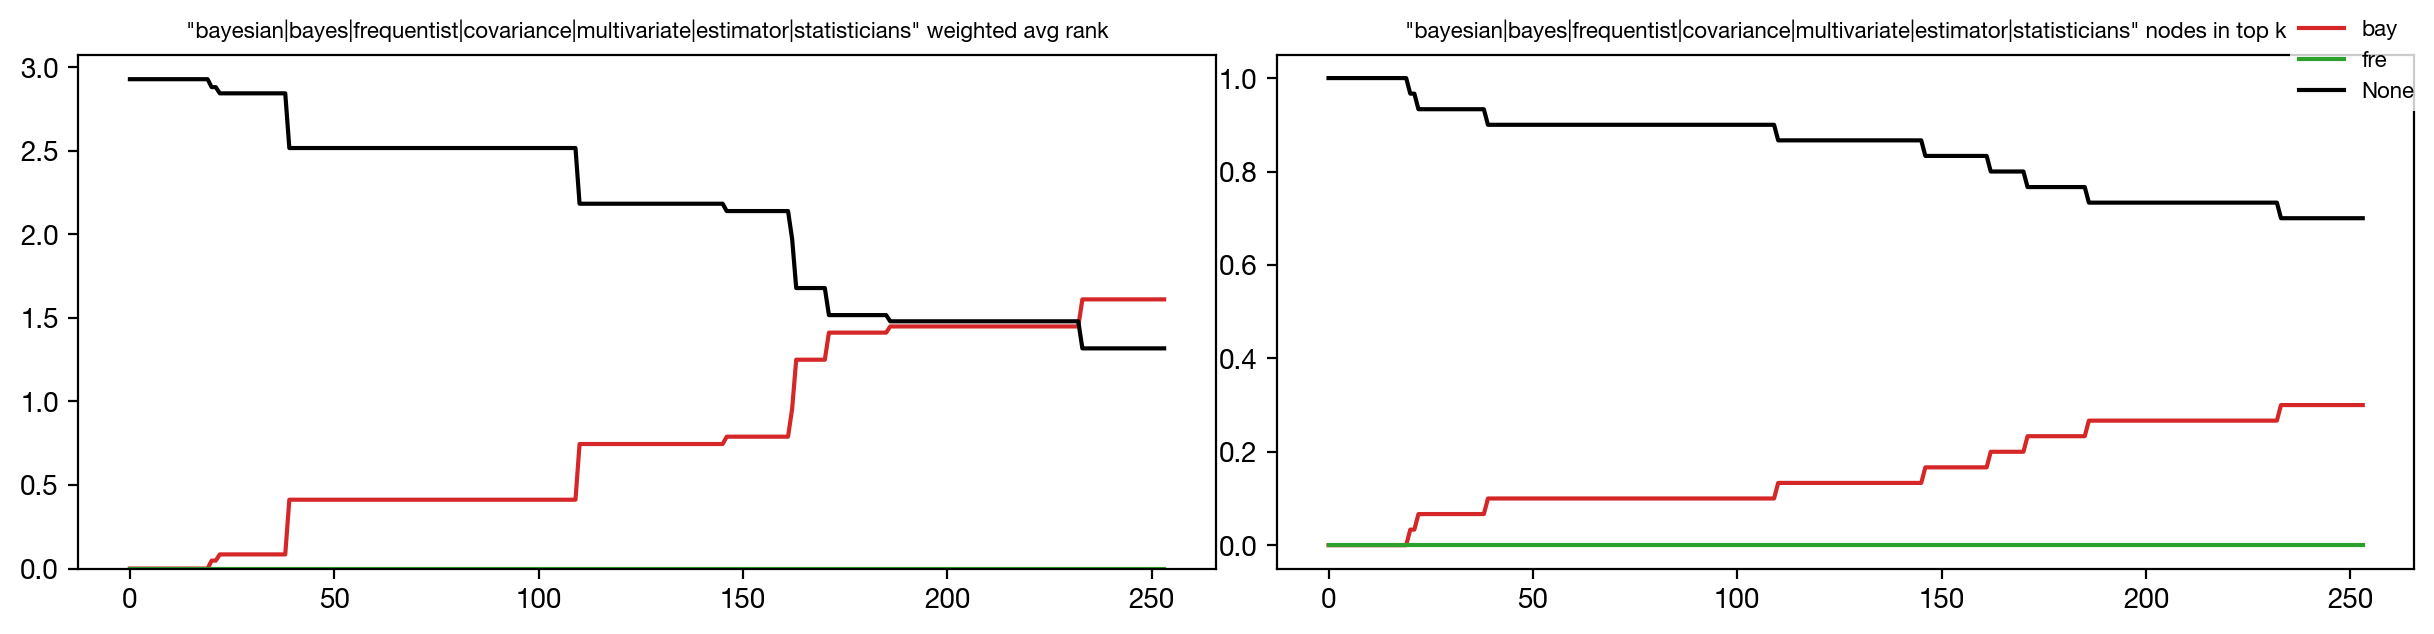

In [16]:
# Plot results

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica Neue')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['image.cmap'] = 'tab10'

fig, axs = plt.subplots(len(config_mitigator["datavoids"]), 2, squeeze=False)
# fig.suptitle('Filtering for nodes that contain a specific data void term in the content')

strategy = strategies_mitigator[0]

print("enumerate(config[datavoids])", list(enumerate(config_mitigator["datavoids"])))
for datavoid_no, datavoid in enumerate(config_mitigator["datavoids"]):
  if isinstance(datavoid, list):
    datavoid = "|".join(datavoid)
  axs_row = axs[datavoid_no]

  xvals = []
  yvals = {
    "weighted_avg_rank": {gr: [] for gr in config_mitigator["target_groups"]},
    "nodes_in_top_k": {gr: [] for gr in config_mitigator["target_groups"]}
  }
  for step_no in sorted(datavoids_steps_per_strategy_mitigator[strategy].keys()):
    xvals.append(step_no)
    for g in config_mitigator["target_groups"]:
      for v in ["weighted_avg_rank", "nodes_in_top_k"]:
        vals = datavoids_steps_per_strategy_mitigator[strategy][step_no][datavoid][g][v]
        y_val = sum(vals) / len(vals)
        yvals[v][g].append(y_val)
      
  for g in config_mitigator["target_groups"]:
    axs_row[0].plot(
        xvals,
        yvals["weighted_avg_rank"][g],
        label=readable_group_name(g),
        color=config_mitigator["groups_colors"][g])
    axs_row[0].set_title(f'"{datavoid}" weighted avg rank', fontsize=8)
    axs_row[0].autoscale(enable=True, axis='y')
    axs_row[0].set_ylim(bottom=0)

    axs_row[1].plot(
        xvals,
        yvals["nodes_in_top_k"][g],
        label=readable_group_name(g),
        color=config_mitigator["groups_colors"][g])
    axs_row[1].set_title(f'"{datavoid}" nodes in top k', fontsize=8)
    axs_row[0].autoscale(enable=True, axis='y')
    axs_row[0].set_ylim(bottom=0)

fig.set_size_inches(12, max(3, len(config_mitigator["datavoids"])))
plt.tight_layout(pad=0.1)
handles, labels = axs_row[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper right', borderaxespad=0.5, fontsize=8)
legend.get_frame().set_linewidth(0.0)

plt.show()

enumerate(config[datavoids]) [(0, ['bayesian', 'bayes', 'frequentist', 'covariance', 'multivariate', 'estimator', 'statisticians'])]


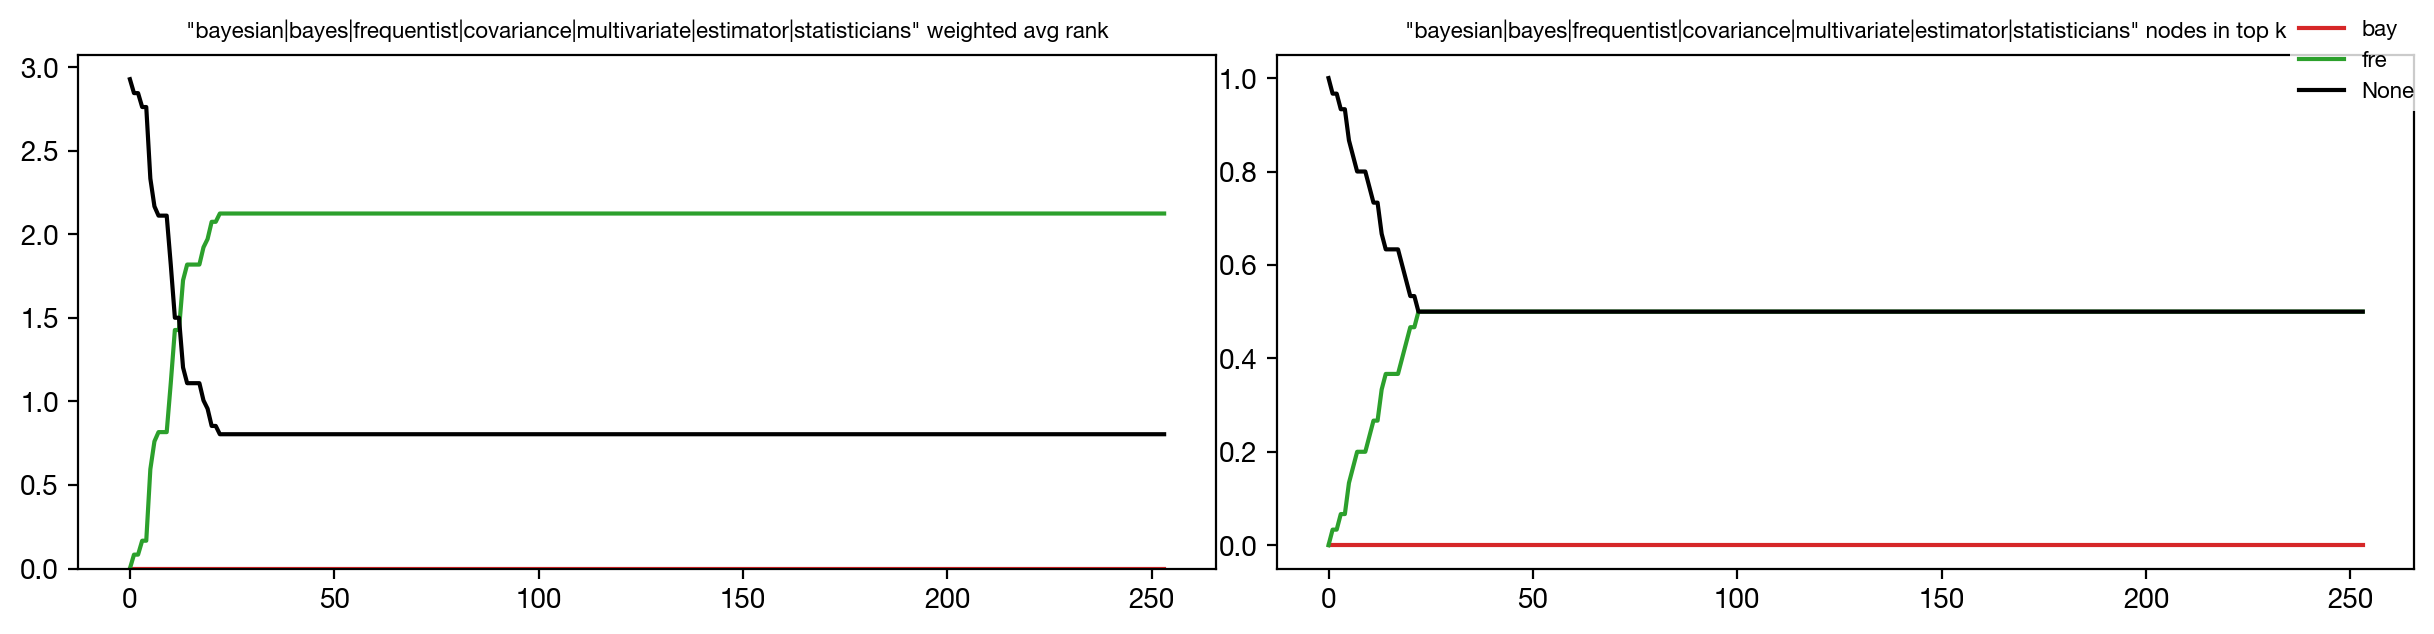

In [17]:
# Plot results

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica Neue')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['image.cmap'] = 'tab10'

fig, axs = plt.subplots(len(config_disinformer["datavoids"]), 2, squeeze=False)
# fig.suptitle('Filtering for nodes that contain a specific data void term in the content')

strategy = strategies_disinformer[0]

print("enumerate(config[datavoids])", list(enumerate(config_disinformer["datavoids"])))
for datavoid_no, datavoid in enumerate(config_disinformer["datavoids"]):
  if isinstance(datavoid, list):
    datavoid = "|".join(datavoid)
  axs_row = axs[datavoid_no]

  xvals = []
  yvals = {
    "weighted_avg_rank": {gr: [] for gr in config_disinformer["target_groups"]},
    "nodes_in_top_k": {gr: [] for gr in config_disinformer["target_groups"]}
  }
  for step_no in sorted(datavoids_steps_per_strategy_disinformer[strategy].keys()):
    xvals.append(step_no)
    for g in config_disinformer["target_groups"]:
      for v in ["weighted_avg_rank", "nodes_in_top_k"]:
        vals = datavoids_steps_per_strategy_disinformer[strategy][step_no][datavoid][g][v]
        y_val = sum(vals) / len(vals)
        yvals[v][g].append(y_val)
      
  for g in config_disinformer["target_groups"]:
    axs_row[0].plot(
        xvals,
        yvals["weighted_avg_rank"][g],
        label=readable_group_name(g),
        color=config_disinformer["groups_colors"][g])
    axs_row[0].set_title(f'"{datavoid}" weighted avg rank', fontsize=8)
    axs_row[0].autoscale(enable=True, axis='y')
    axs_row[0].set_ylim(bottom=0)

    axs_row[1].plot(
        xvals,
        yvals["nodes_in_top_k"][g],
        label=readable_group_name(g),
        color=config_disinformer["groups_colors"][g])
    axs_row[1].set_title(f'"{datavoid}" nodes in top k', fontsize=8)
    axs_row[0].autoscale(enable=True, axis='y')
    axs_row[0].set_ylim(bottom=0)

fig.set_size_inches(12, max(3, len(config_disinformer["datavoids"])))
plt.tight_layout(pad=0.1)
handles, labels = axs_row[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper right', borderaxespad=0.5, fontsize=8)
legend.get_frame().set_linewidth(0.0)

plt.show()